In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2
'''
저장되어있는 이미지를 불러와 .npy 파일을 생성
.npy 파일로 train, test를 수행할 것임
폭과 높이를 조정가능
'''
groups_folder_path= 'D:\Dataset\CNN_train\\'
categories=["alcoholic","non-alcoholic"]
num_classes=len(categories)
image_w = 128
image_h = 64
X = []
Y = []
for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '\\'
    print(image_dir)
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename,label)
            img = cv2.imread(image_dir+filename)
            img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
            X.append(img/256)
            Y.append(label)

D:\Dataset\CNN_train\alcoholic\
D:\Dataset\CNN_train\alcoholic\final1.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final10.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final100.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final101.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final102.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final103.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final104.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final105.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final106.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final107.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final108.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final109.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final11.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final110.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final111.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final112.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final113.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final114.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final115.png [1, 0]
D:\

In [113]:
from sklearn.model_selection import train_test_split

X = np.array(X)
Y = np.array(Y)
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
xy = (X_train, X_test, Y_train, Y_test)
 
np.save("D:\Dataset\CNN_train\img_data.npy", xy)

In [124]:
from keras import layers,models
import tensorflow as tf

X_train,X_test,y_train,y_test=np.load('D:\Dataset\CNN_train\img_data.npy',allow_pickle=True)
model=models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64, 128, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(1,1),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='softmax'))


In [125]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=32, epochs=30)

Epoch 1/30
12/12 [==============================] - 4s 257ms/step - loss: 3.7974 - accuracy: 0.4832
Epoch 2/30
12/12 [==============================] - 3s 252ms/step - loss: 0.9221 - accuracy: 0.5279
Epoch 3/30
12/12 [==============================] - 3s 258ms/step - loss: 0.7093 - accuracy: 0.5587
Epoch 4/30
12/12 [==============================] - 3s 250ms/step - loss: 0.6740 - accuracy: 0.5363
Epoch 5/30
12/12 [==============================] - 3s 251ms/step - loss: 0.6558 - accuracy: 0.6732
Epoch 6/30
12/12 [==============================] - 3s 251ms/step - loss: 0.6298 - accuracy: 0.6369
Epoch 7/30
12/12 [==============================] - 3s 255ms/step - loss: 0.6213 - accuracy: 0.6425
Epoch 8/30
12/12 [==============================] - 3s 253ms/step - loss: 0.5760 - accuracy: 0.7402
Epoch 9/30
12/12 [==============================] - 3s 256ms/step - loss: 0.5483 - accuracy: 0.7346
Epoch 10/30
12/12 [==============================] - 3s 254ms/step - loss: 0.5446 - accuracy: 0.7207

In [211]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

4/4 - 0s - loss: 0.2599 - accuracy: 0.8833 - 162ms/epoch - 40ms/step


Text(0.5, 1.0, 'loss per epoch')

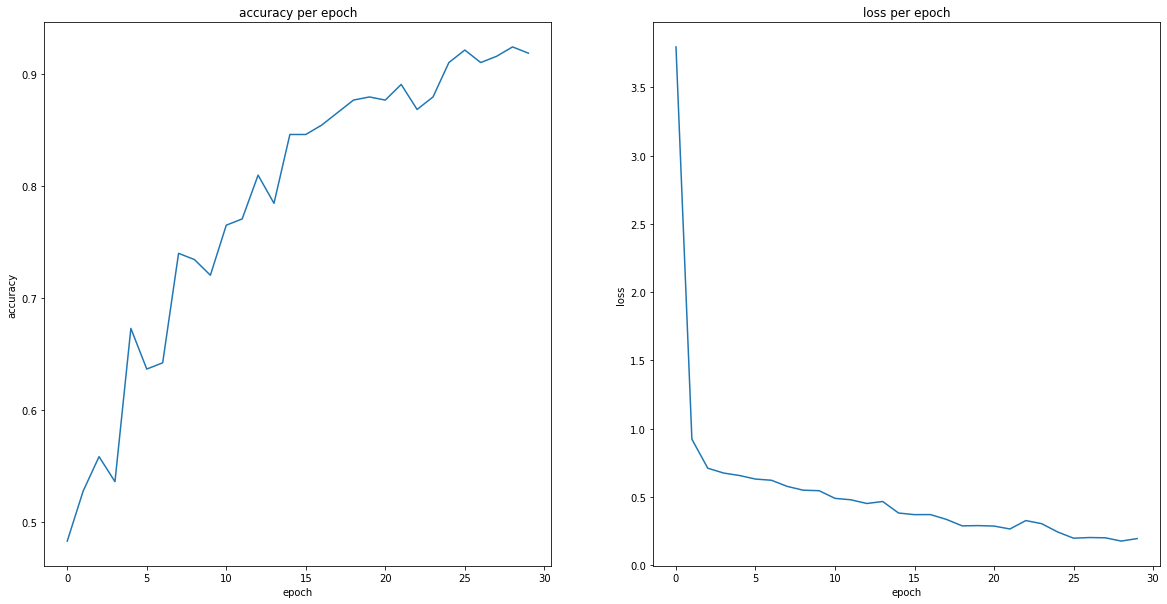

In [210]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].set_title('accuracy per epoch')
ax[1].plot(history.history['loss'])
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].set_title('loss per epoch')